<h2> Final Project: California Housing Prices <h2></h2>


# About the Dataset

This dataset shows information about different neighborhoods in California from the 1990. It includes details like where each neighborhood is located, how much money people there usually make, how old the houses are, and how many rooms they have. All of this information helps us understand and predict how much houses cost in different areas.

## **Import the required libraries**


In [5]:
# Cell 1: Import libraries
import os
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Importing Data Sets


In [7]:
# Download housing.csv 
if 'housing.csv' not in os.listdir():
    url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
    urllib.request.urlretrieve(url, "housing.csv")
    print("housing.csv downloaded successfully!")
else:
    print("housing.csv already exists in the folder.")


housing.csv already exists in the folder.


In [8]:
# Load the dataset
housing = pd.read_csv('housing.csv')
print("Data loaded successfully!")


Data loaded successfully!


In [19]:
# Show first 5 rows
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [23]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Data Wrangling




#1 Rename columns for consistency. Convert column names to snake_case for easier handling.
#2 Handle missing values: Check for missing values
Fill with median: we can replace the missing values of the column 'bedrooms' with the mean of the column 'bedrooms'  using the method replace(). 
Drop rows 
Create new meaningful features
Example: rooms_per_household = total_rooms / households


In [33]:
# Step 1: Rename columns to snake_case
housing.columns = [col.lower().replace(' ', '_') for col in housing.columns]

# Step 2: Handle missing values in 'total_bedrooms'
# Fill with median
median_bedrooms = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median_bedrooms, inplace=True)

# Step 3: Create new features
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

# Step 4: Confirm changes
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


In [35]:
#  Check again for missing values
housing.isnull().sum()

longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
median_house_value          0
ocean_proximity             0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
dtype: int64

# Exploratory Data Analysis (EDA)


### Value_counts() 
is an useful for categorical columns like ocean_proximity to see how many districts fall into each category 


In [11]:
# Value counts for the 'ocean_proximity' column
housing['ocean_proximity'].value_counts()


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

### boxplot()
Boxplots help visualize the distribution and detect outliers. 

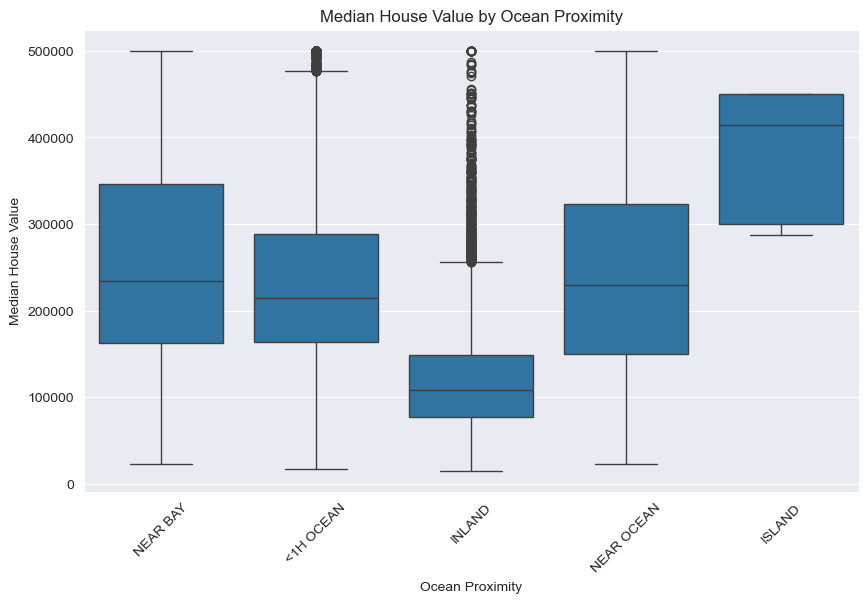

In [12]:
# Boxplot for median house value by ocean proximity
plt.figure(figsize=(10,6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=housing)
plt.title('Median House Value by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.xticks(rotation=45)
plt.show()


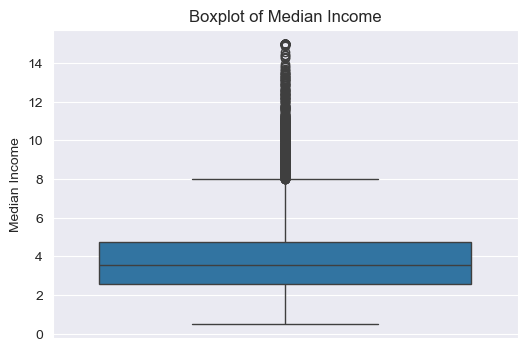

In [13]:
# Boxplot for median income
plt.figure(figsize=(6,4))
sns.boxplot(y=housing['median_income'])
plt.title('Boxplot of Median Income')
plt.ylabel('Median Income')
plt.show()


### Regplot

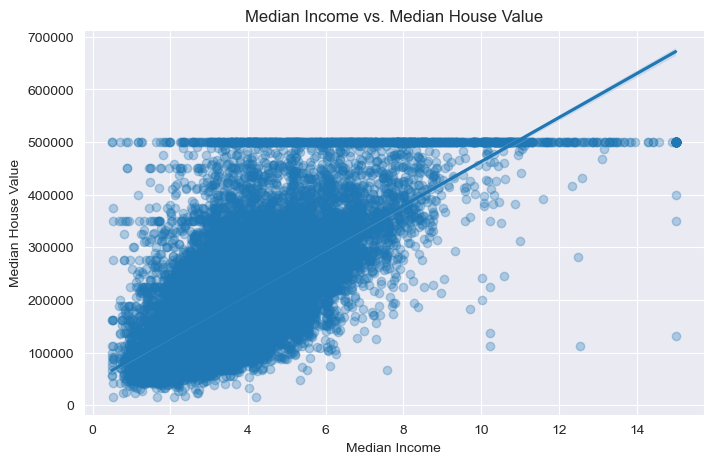

In [42]:
# Relationship between median income and house value
plt.figure(figsize=(8,5))
sns.regplot(x='median_income', y='median_house_value', data=housing, scatter_kws={"alpha":0.3})
plt.title('Median Income vs. Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()


 Each dot is a house (or district) with its income and house value.
 The line slopes upward, so higher income generally means higher house value.
 points are closely clustered around the line, the relationship is strong. 
 points very far from the line (maybe unusual houses or data errors)

###  Residual Plots

using Residual Plots to check the leftover errors (residuals). Residual plot shows the difference between predicted and actual values, which is crucial to assess whether a regression model is working well. it help to understand whether the model fit the data appropriately.

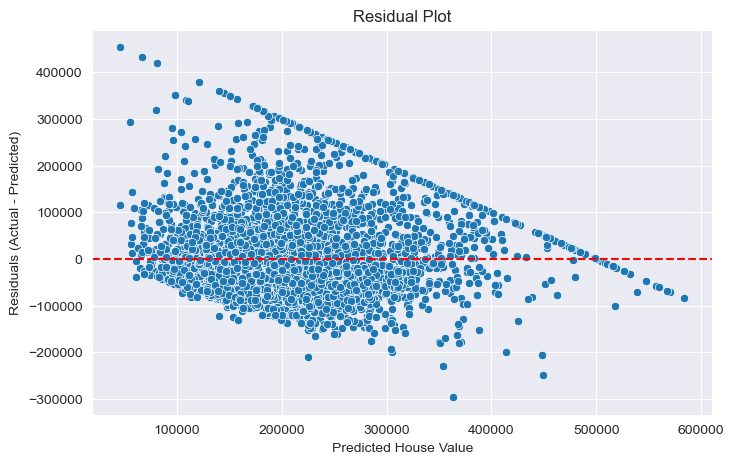

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted House Value')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.show()


Good residuals: they look random and centered around zero

We can use the Pandas method <code>corr()</code>  to find the feature other than price that is most correlated with price.


In [14]:
# Compute correlation matrix
correlation_matrix = housing.corr(numeric_only=True)

# Display correlation of all features with 'median_house_value'
correlation_with_price = correlation_matrix['median_house_value'].sort_values(ascending=False)

# Show the top 5 features most correlated with house value
correlation_with_price


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

median_income is most strongly correlated with house value (about 0.68).


# Modeling Analysis


### Linear Regression



In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Define feature and target
X = housing[['median_income']]
y = housing['median_house_value']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred = lr.predict(X_test)

# Evaluate
print('Linear Regression (1 feature) R²:', r2_score(y_test, y_pred))


Linear Regression (1 feature) R²: 0.45885918903846656


### Polynomial Regression

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# Define feature and target
X = housing[['median_income']]
y = housing['median_house_value']

# Create polynomial features (degree = 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Fit the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred = lr.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print results
print("Polynomial Regression (1 feature, degree=2)")
print(f"R² Score: {r2:.4f}")
print(f"MAE: ${mae:,.2f}")
print(f"RMSE: ${rmse:,.2f}")


Polynomial Regression (1 feature, degree=2)
R² Score: 0.4633
MAE: $62,829.16
RMSE: $83,861.39


### Ridge regression

In [69]:
# Rename column
housing = housing.rename(columns={'longitude': 'long'})

# Define features and target
features = [
    'median_income', 'housing_median_age', 'total_rooms', 'total_bedrooms',
    'population', 'households', 'latitude', 'long',
    'rooms_per_household', 'bedrooms_per_room', 'population_per_household'
]

X = housing[features]
y = housing['median_house_value']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Output
print("Ridge Regression (Multi-variable)")
print(f"R² Score: {r2:.4f}")
print(f"MAE: ${mae:,.2f}")
print(f"RMSE: ${rmse:,.2f}")


Ridge Regression (Multi-variable)
R² Score: 0.5829
MAE: $51,878.16
RMSE: $73,932.16


## Hyperparameter Tuning:

In [74]:
params = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
grid = GridSearchCV(Ridge(), params, scoring='r2', cv=5)
grid.fit(X_train, y_train)
print('Best alpha:', grid.best_params_['alpha'])
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print('Best Ridge R²:', r2_score(y_test, y_pred))

Best alpha: 1.0
Best Ridge R²: 0.4633180909199841


alpha = 1 that’s the sweet spot between:Fitting the training data well
and not overfitting (so it generalizes well to new data)
